# Visualize the global cell state manifold

In this tutorial, we will visualize the cell type distributions and gene expression patterns on a global map of cell states. 

Let's begin by importing the required packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

Let's load a representation dataset of global cell states.

In [2]:
adata_ref = sc.read_h5ad('data/ref_global_cell_state_manifold.h5ad')
adata_ref

AnnData object with n_obs × n_vars = 133061 × 18108
    obs: 'dataset_id', 'assay', 'batch', 'development_stage', 'tissue', 'cell_type', 'major_cell_type'
    var: 'human_gene_name'
    obsm: 'X_scmg', 'X_umap'
    layers: 'unmeasured_genes'

## Visualize cell type distributions

The representation dataset contains subsampled cells from multiple scRNA-seq datasets, which together cover most of human and mouse cell types. Cells from the representation dataset have already been embedded by the SCMG model into a 512 dimensional latent space of cell states. The SCMG embedding removes artificial variation due to batch effects of different experiments while keeping the biological variation.

From the 512 dimensional embedding, a 2D UMAP was generated to create a visualization of the global map of cell states. Let's visualize the UMAP and color the cells by their major type and their original dataset names.

In [3]:
sc.pl.umap(adata_ref, color=['major_cell_type'])
sc.pl.umap(adata_ref, color=['dataset_id'])

Cells of different types are distinct on the UMAP and similar cell types from different datasets or species are mixed with each other.

Starting from early embryonic stem cells, the cell states diverge into three major branches highly agreeing with developmental lineages from the germ layers. The neuronal branch corresponds to the neural ectoderm, consisting of neural progenitor cells, neurons and glia. The mesenchymal branch comprises bone cells, stromal cells, smooth muscle cells and vascular cells, which are mainly developed from mesoderm. Most endoderm derived cells fall into the epithelial branch, including intestine cells, pancreatic cells, and cells from the respiratory system. The blood cells form a tree-like structure on the UMAP, with blood progenitor cells in the center branching into different lineages of blood and immune cells.

While the 2D UMAP provides rich information about similarities between cell states, it is important to be aware that UMAP is only an approximate representation of the high dimensional manifold, and can artificially make some cells separate or close to each other. For example, although skeletal muscle cells are developed from embryonic stem cells through a continuous trajectory of cell states, they are separated on the 2D representation to accommodate for the relative distances of other cell types. Despite these artifacts, the 2D UMAP visualizes the global mammalian cell states in a biologically meaningful representation.

The 2D global map not only reveals the large-scale structures of the cell state manifold, but also distinguishes the differences between fine-grained cell types. To show this, let's color the cells by their fine-grained cell types.

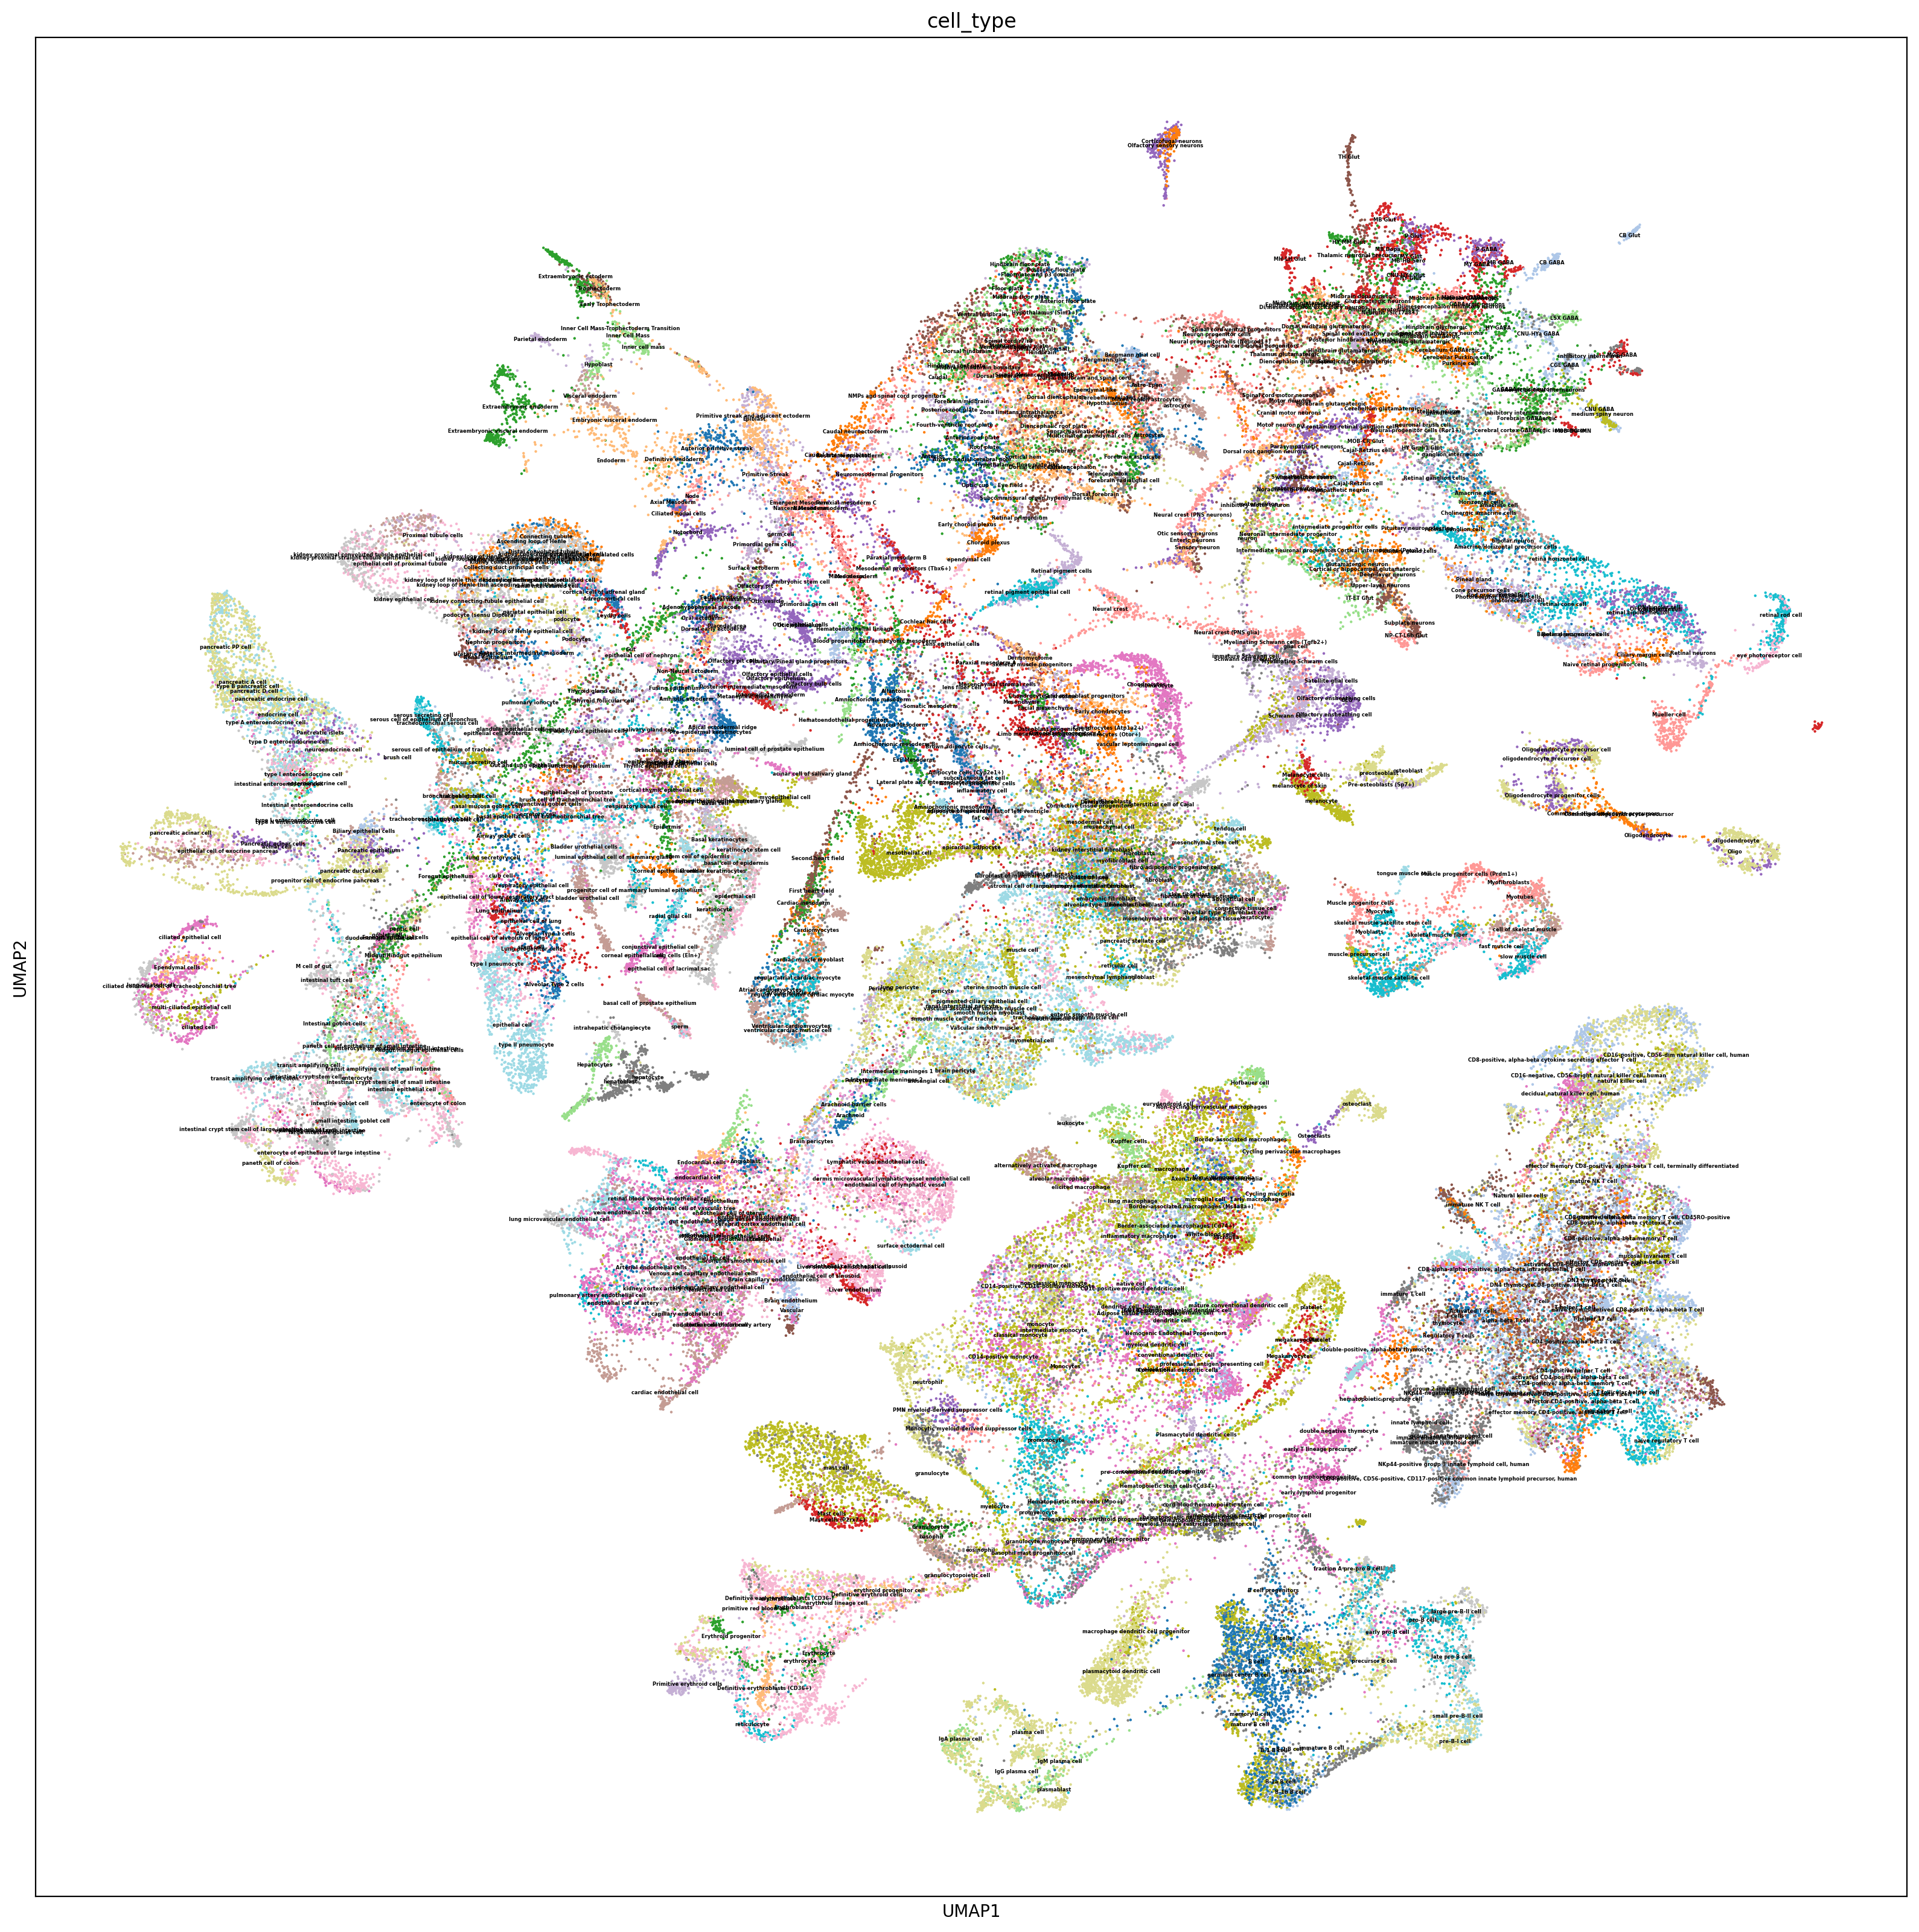

In [4]:
fig, ax = plt.subplots(figsize=(20, 20), dpi=200)
sc.pl.umap(adata_ref, color='cell_type', palette='tab20',
           legend_loc='on data', legend_fontsize=3, ax=ax, s=10)

## Visualize gene expression patterns

A main advatange of creating a 2D global map of cell states is that the gene expression pattern across different cell states can be visualized in a highly intuitive representation.

For example, let's plot a few transcription factor genes that are highly expressed in erythrocytes.

In [5]:
# Normalize the gene counts
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.log1p(adata_ref)

# Use the gene names to index the genes
adata_ref.var['human_gene_id'] = adata_ref.var.index
adata_ref.var.index = adata_ref.var['human_gene_name']

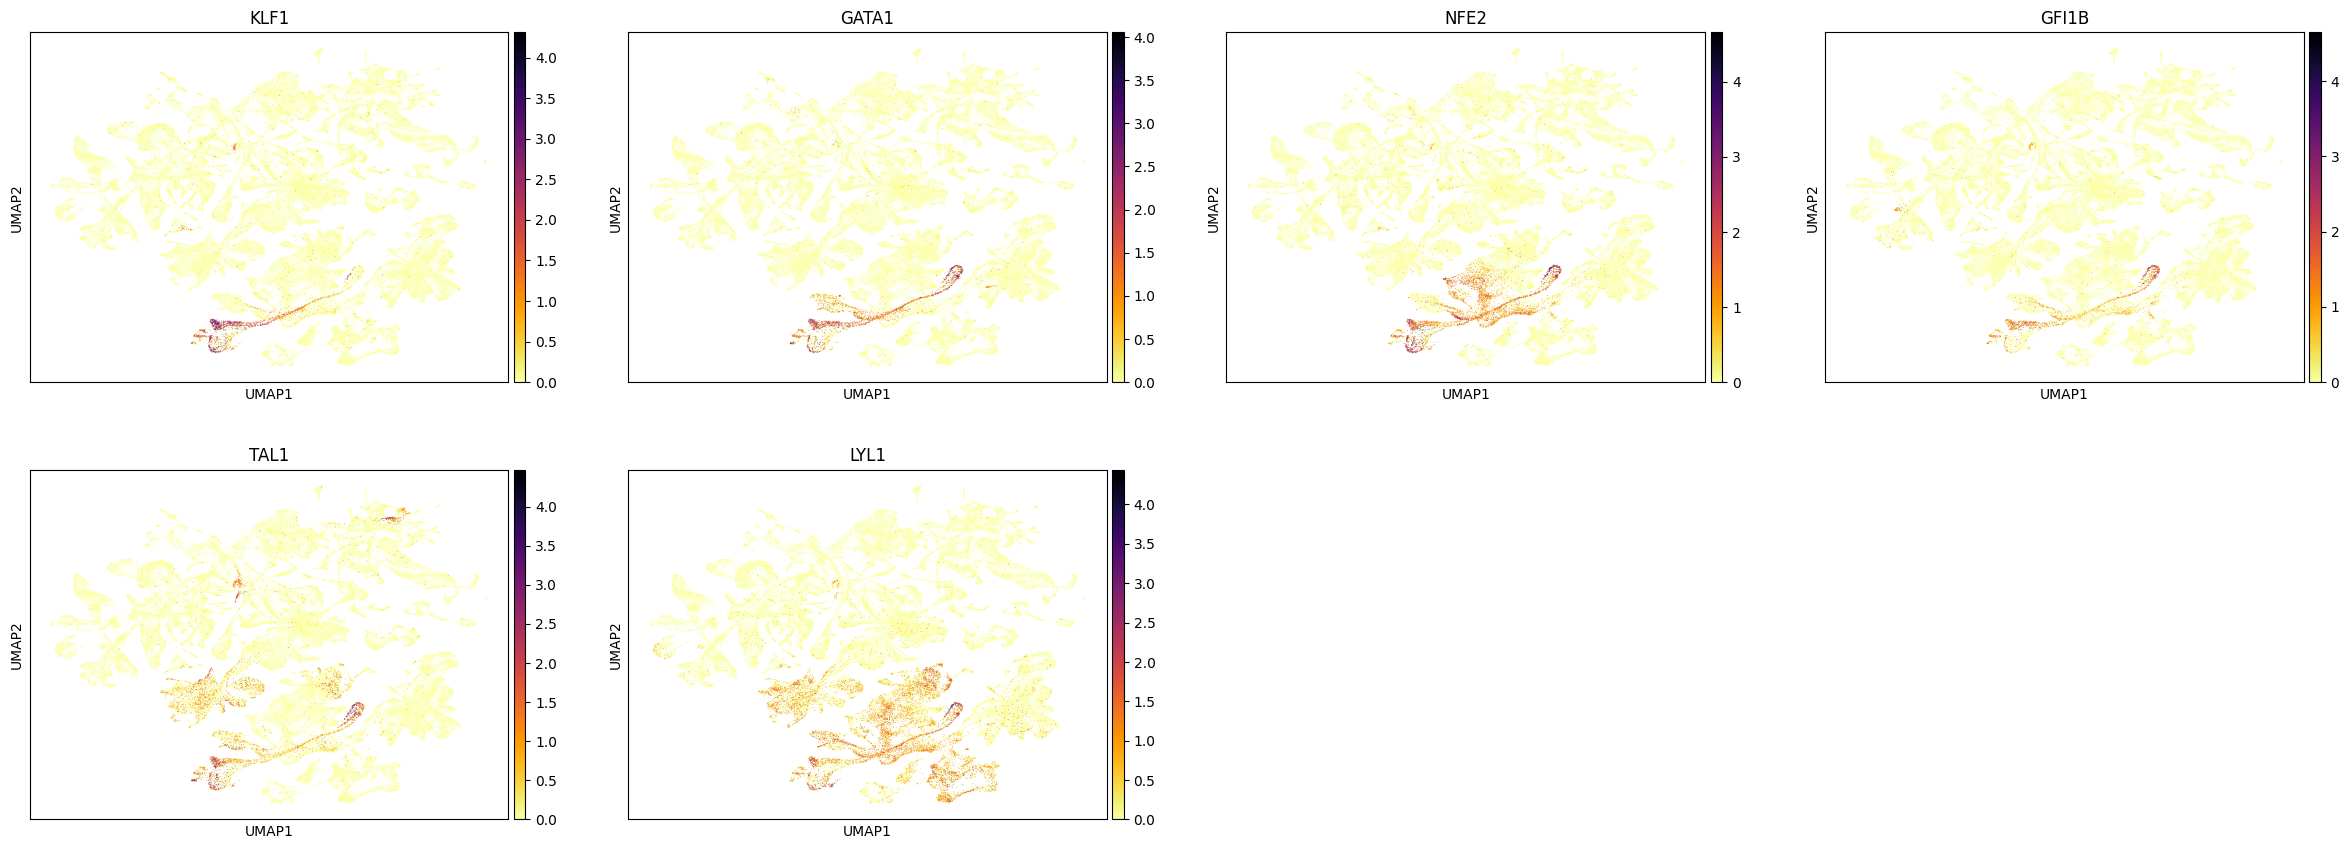

In [6]:
# Plot the UMAP with the gene expressions
sc.pl.umap(adata_ref, color=['KLF1', 'GATA1', 'NFE2', 'GFI1B', 'TAL1', 'LYL1'],
           cmap='inferno_r')

Here we can see that KLF1 is highly specific to erythrocytes, reflecting its crucial role in terminal erythropoiesis progression. GATA1, NFE2 and GFI1B, which are key regulators of the megakaryocyte-erythroid lineage in hematopoiesis, are also highly expressed in megakaryocytes. TAL1 and LYL1 are expressed in multiple blood lineages as well as endothelial cells, exemplifying shared TFs in gene regulatory networks of distinct cell types. The global expression plots revealed that the embryonic hematoendothelial progenitor cells highly expressed TAL1, but not GATA1 which is considered as the master regulator for adult erythropoiesis, highlighting the essential role of TAL1 in the initiation of embryonic blood development.

We can also plot the mean expression of a group of genes with similar functions. For example, let's plot the mean expression levels of all collagen genes. 

/home/xingjiepan/Softwares/conda/anaconda3/envs/scmg/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


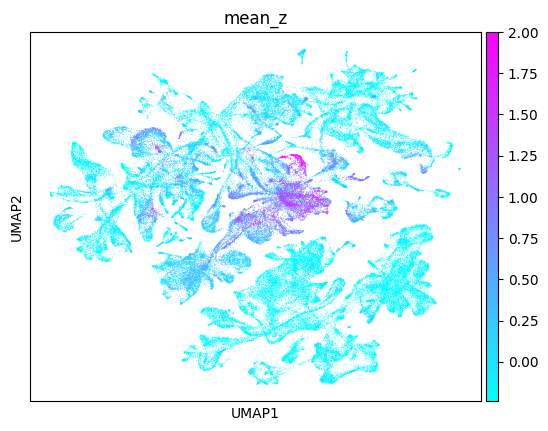

In [7]:
# Select genes of interest
selected_genes = ['COL4A3', 'COL1A2', 'COL4A1', 'COL6A5', 'COL2A1', 'COL4A2', 'COL4A4', 'COL6A2', 'COL6A6', 'COL1A1', 'COL6A3', 'COL9A2', 'COL6A1', 'COL4A6', 'COL9A1', 'COL4A5']
selected_adata = adata_ref[:, adata_ref.var.index.isin(selected_genes)].copy()
selected_adata.X = selected_adata.X.toarray()

# Scale the gene expressions
selected_adata.X = (selected_adata.X - selected_adata.X.mean(axis=0)[None, :]) / np.maximum(0.1, selected_adata.X.std(axis=0))[None, :]

# Plot the mean expression of the selected genes
selected_adata.obs['mean_z'] = selected_adata.X.mean(axis=1)
sc.pl.umap(selected_adata, color=['mean_z'], vmax=2, cmap='cool')

We can see that the mesenchymal cells are the main producers of collagen.